## Step 3 : shift the expansion M2M

In the step 2 we grouped the sources in the same cell; but when the number
of particles is large we need to build a hierarchical structure to group the particles, and make the code more efficient.

We already know that the multipole of a cell only depends on the sources in that cell and the center of that cell. (the multipole is a "property" of a cell).

Due to this "property", we are going to be able to evaluate the multipole of a parent cell given the multipole of its child cells. 

Here is how look some terms of the multipole expansion of a child cell $$c:

\begin{equation}
\begin{split}
M_c &= \sum_{j=0}^{N_c} m_j\\
D_{c_x} &= \sum_{j=0}^{N_c} m_j\,( x_c - x_j)\\
Q_{c_{xx}} &= \sum_{j=0}^{N_c} \frac{1}{2}m_j\, ( x_c - x_j)^2 \\
Q_{c_{xy}} &= \sum_{j=0}^{N_c} \frac{1}{2}m_j\, (x_c-x_j)(y_c-y_j) \\
\end{split}
\end{equation}

where $N_c$ is the number of sources in the child cell, $x_c$ is the cell's center, $M$, $D$, $Q$ are respectively monopole, dipole and quadrupole. (here only showing some terms, the other ones are similar)

We will expand the particles from a *child* cell to a *parent* one, we will need to shift the center of expansion from ($x_c$, $y_c$, $z_c$) to ($x_p$, $y_p$, $z_p$). The expansion of the particles of a parent cell $p$ with 8 child cells:

(We present some terms of the expansion, the other ones are similar.)

\begin{equation}
\begin{split}
M_p &= \sum_{j=0}^N m_j = \sum_{c=0}^7 M_c\\
D_{p_x} &= \sum_{j=0}^N m_j\,( x_p - x_j) = \sum_{c=0}^7 \left[\sum_{j=0}^{N_c} m_j\,(x_c-x_j) + ( x_p-x_c)\sum_{j=0}^{N_c} m_j\right]\\
&= \sum_{c=0}^{7} \left[D_{c_x} + (x_p-x_c)\,M_c\right] \\
Q_{p_{xx}} &= \sum_{j=0}^N \frac{1}{2}m_j \,(x_p - x_j)^2 = \sum_{c=0}^7 \left[\sum_{j=0}^N \frac{1}{2}m_j\left[(x_c-x_j)+(x_p-x_c)\right]^2 \right]\\
&= \sum_{c=0}^7 \left[\sum_{j=0}^N \frac{1}{2}m_j (x_c - x_j)^2 + (x_p-x_c) \sum_{j=0}^N m_j(x_c-x_j) + \frac{(x_p-x_c)^2}{2} \sum_{j=0}^N m_j \right]\\
&= \sum_{c=0}^7 \left[Q_{c_{xx}} + (x_p-x_c)D_c + \frac{(x_p-x_c)^2}{2}M_c \right]\\
Q_{p_{xy}} &= \sum_{j=0}^{N} \frac{1}{2}m_j\, (x_p-x_j)(y_p-y_j) \\
&= \sum_{c=0}^7 \left[\sum_{j=0}^{N} \frac{1}{2}m_j(x_c-x_j)(y_c-y_j) + \frac{(x_p-x_c)}{2}\sum_{j=0}^{N}m_j(y_c-y_j) \right.\\
&+\left. \frac{(y_p-y_c)}{2}\sum_{j=0}^{N}m_j(x_c-x_j) + \frac{(x_p-x_c)(y_p-y_c)}{2}\sum_{j=0}^{N}m_j\right]\\
&= \sum_{c=0}^7 \left[ Q_{c_{xy}} +\frac{(x_p-x_c)}{2}D_{c_y} +\frac{(y_p-y_c)}{2}D_{c_x} + \frac{(x_p-x_c)(y_p-y_c)}{2}M_c \right]
\end{split}
\end{equation}

Each multipole term $M_p$, $D_p$, $Q_p$ in parent cell can be expressed by a summation of its child's multipole terms $M_c$, $D_c$, $Q_c$. Therefore, we refer this expansion shifting process as **Multipole-to-Multipole** or **M2M**

In [1]:
import numpy
from treecode_helper import Particle, distance, l2_err, plot_err
from matplotlib import pyplot, rcParams
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D

# customizing plot parameters
rcParams['figure.dpi'] = 100
rcParams['font.size'] = 16
rcParams['font.family'] = 'StixGeneral'

In [2]:
n = 50     # number of particles
m = 1./n    # mass

# initialize sources and targets
source_coords = numpy.random.random((n, 3)).tolist()
target_coords = (-numpy.random.random((n, 3))).tolist()
sources = [ Particle(coord, m=m) for coord in source_coords ]
targets = [ Particle(coord, m=m) for coord in target_coords ]

In [3]:
class Cell():
    '''
    The class for a cell
    
    Attributes:
    -----------
        x, y, z: x, y and z coordinates of the cell's center
        multipole: the array that contains the multipoles of a cell
    '''
    
    def __init__(self, x=None, y=None, z=None):
        
        #coordinates
        self.x = x
        self.y = y
        self.z = z
        
        #multipole array
        self.multipole = numpy.zeros(10)

In [4]:
#Creating a parent cell
parent = Cell(0.5, 0.5, 0.5) #the inputs are the coordinates of the cell's center

#Creating the 8 child-cells
octant = numpy.arange(8)

#Remember in python 3 the // is integer division 
x = (octant%2) * parent.x + parent.x/2.
y = ((octant//2)%2) * parent.y + parent.y/2.
z = ((octant//4)%2) * parent.z + parent.z/2.

#Group of child cells
children = [ Cell(x[i], y[i], z[i]) for i in range(8) ]
#print(children[0].x)

In [5]:
#I was doing this to understand the previous cell, it seems it is a
#pretty common way of indexing and locating coordinates in a 3D structure. 
'''octant = numpy.arange(8)

x = octant%2
y = (octant//2)#%2
z = (octant//4)#%2


print(octant)
#print(x)
print(y)
#print(z)
''';

In [6]:
def P2M(sources, parent, children):
    '''
    Calculate the multipoles for the child cells.
    
    Arguments:
    ----------
        sources: list of source objects in Particle class
        parent: parent cell object
        children: list of child cell objects 
    '''
    
    for source in sources:
        
        octant = (source.x > parent.x) + ((source.y > parent.y) << 1) + ((source.z > parent.z) << 2) 
        
        dx = children[octant].x - source.x
        dy = children[octant].y - source.y
        dz = children[octant].z - source.z
        
        children[octant].multipole += source.m * numpy.array((1, dx, dy, dz, 0.5*dx**2, 0.5*dy**2, 0.5*dz**2,\
                                                              0.5*dx*dy, 0.5*dy*dz, 0.5*dz*dx)) 

In [7]:
#Notes to understand the function P2M
#We can sum logic operations, if the statement is True then the
#value assigned to that operation is 1, if it is False is 0 then,
#for example (3<1)+(3<1) = 0 , (3>1)+(3<1) = 1, (3>1)+(3>1) = 2

#Doing this to understand shifting "<<"
'''
print(0<<1)  
print(1<<1)
print(2<<1)
print('-----')
print(0<<2)
print(1<<2)
print(2<<2)
''';

x << y
    
Returns x with the bits shifted to the left by y places (and new bits on the right-hand-side are zeros). This is the same as multiplying x by 2**y. 

x >> y

Returns x with the bits shifted to the right by y places. This is the same as //'ing x by 2**y. 

In [8]:
P2M(sources, parent, children)

In [9]:
def M2M(parent, children):
    
    '''
    Calculate the parent's multipole based on the children's ones.
    
    Argument:
    ---------
        parent: parent cell object.
        children: the list of child cell objects.
    '''
    
    for child in children:
        
        dx, dy, dz = (parent.x - child.x), (parent.y - child.y), (parent.z - child.z) #the shift we mentioned before
        
        parent.multipole += child.multipole # the parent multipole has all the child terms plus other ones
        
        parent.multipole[1:4] += child.multipole[0] * numpy.array((dx, dy, dz)) 
        
        parent.multipole[4:7] += child.multipole[1:4] * numpy.array((dx, dy, dz)) + \
                                 0.5 * child.multipole[0] * numpy.array((dx**2, dy**2, dz**2))
        
        parent.multipole[7:] += 0.5 * numpy.array((child.multipole[2],child.multipole[3],child.multipole[1])) *  numpy.array((dx, dy, dz)) \
                                + 0.5*child.multipole[1:4] * numpy.array((dy, dz, dx))\
                                + 0.5*child.multipole[0] * numpy.array((dx*dy, dy*dz, dz*dx)) 
        

In [10]:
M2M(parent, children)

In [11]:
def eval_potential(targets, multipole, center):
    
    '''
    Given target list, multipole and expansion center, return the array of target's potentials.
    
    Arguments:
    ----------
        targets: list of target objects in particle class.
        multipole: the multipole array of the cell. 
        center: the point object of expansion center. 
        
    Returns:
    --------
        phi: the potential array of targets.
    '''
    
    # prepare for array operation
    target_x = numpy.array([target.x for target in targets])
    target_y = numpy.array([target.y for target in targets])
    target_z = numpy.array([target.z for target in targets])
    
    target_array = [target_x, target_y, target_z]
    
    # calculate the distance between each target and center
    r = distance(target_array, center)
    
    # prearrange some constants for weight
    dx, dy, dz = target_x-center.x, target_y-center.y, target_z-center.z
    r3 = r**3
    r5 = r3*r**2
    
    # calculate the weight for each multipole
    weight = [1/r, -dx/r3, -dy/r3, -dz/r3, 3*dx**2/r5 - 1/r3, \
              3*dy**2/r5 - 1/r3, 3*dz**2/r5 - 1/r3, 3*dx*dy/r5, \
              3*dy*dz/r5, 3*dz*dx/r5]
    
    # evaluate potential
    phi = numpy.dot(multipole, weight)
    
    return phi
    

In [12]:
phi_multi = eval_potential(targets, parent.multipole, parent)

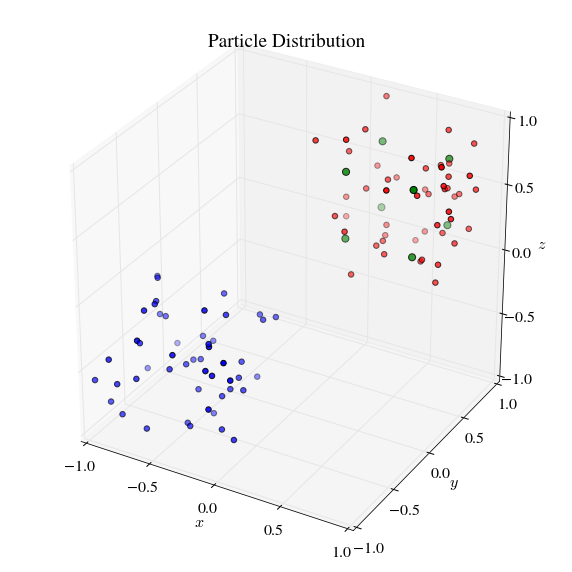

In [13]:
# plot spatial particle distribution
fig = pyplot.figure(figsize=(10,10))
# left plot
ax = fig.add_subplot(1,1,1, projection='3d')
ax.scatter([target.x for target in targets], 
           [target.y for target in targets], 
           [target.z for target in targets], s=30, c='b')
ax.scatter([source.x for source in sources], 
           [source.y for source in sources], 
           [source.z for source in sources], s=30, c='r')
ax.scatter(x, y, z, s=50, c='g')
ax.set_xlim3d(-1,1)
ax.set_ylim3d(-1,1)
ax.set_zlim3d(-1,1)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$z$')
ax.set_title('Particle Distribution');

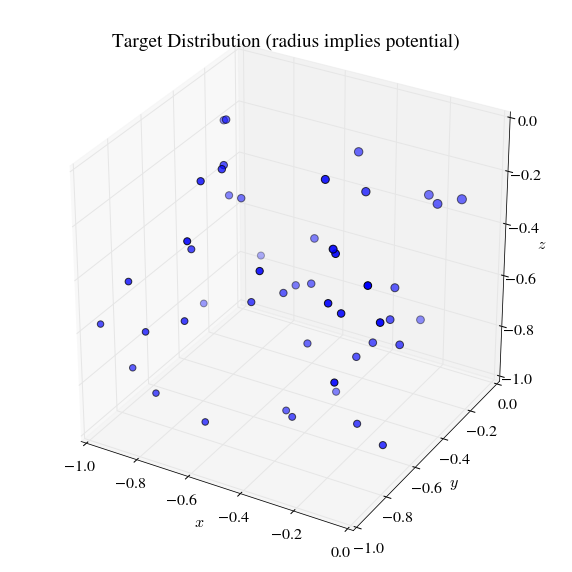

In [14]:
# plot spatial particle distribution
fig = pyplot.figure(figsize=(10,10))
# right plot
ax = fig.add_subplot(1,1,1, projection='3d')
scale = 100   # scale for dot size in scatter plot
ax.scatter([target.x for target in targets], 
           [target.y for target in targets], 
           [target.z for target in targets],
           s=phi_multi*scale, c='b')
ax.set_xlim3d(-1,0)
ax.set_ylim3d(-1,0)
ax.set_zlim3d(-1,0)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$z$')
ax.set_title('Target Distribution (radius implies potential)');

In [15]:
def direct_sum(sources, targets):
    """Calculate the gravitational potential (target.phi) at each target 
    particle using direct summation method.

    Arguments:
        sources: the list of source objects in 'Particle' class
        targets: the list of target objects in 'Particle' class

    """
    for target in targets:
        for source in sources:
            r = target.distance(source)
            target.phi += source.m/r

In [16]:
direct_sum(sources, targets)

In [17]:
phi_direct = numpy.array([target.phi for target in targets])

In [18]:
l2_err(phi_direct, phi_multi)

L2 Norm error: 0.0007548554794527618


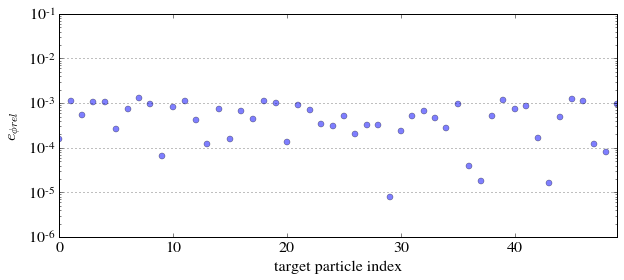

In [19]:
plot_err(phi_direct, phi_multi)

In [20]:
%timeit direct_sum(sources, targets)

100 loops, best of 3: 6.76 ms per loop


In [21]:
%%timeit
P2M(sources, parent, children)
M2M(parent, children)
eval_potential(targets, parent.multipole, parent)

1000 loops, best of 3: 782 µs per loop


The results show a good match between multi-level multipole expansion and direct summation. We first perform a P2M for each child cell to calculate the multipoles of child cell (expansion at the child's cell center). Then we use M2M kernel to calculate the multipole of parent cell (shift the expansion to the parent's cell center). Finally, we evaluate the potential by multipole expansion. Here we only have one parent cell and its eight child cells, however, when there are millions of particles, we need to build a more complex hierarchical tree to store the particles. Child cells may still have their child cells, and evaluation of the potentials may require a traverse of the tree. So in the next notebook, we will discuss how to 'construct' this tree of cells.